In [1]:
import torchvision
import numpy as np
import Viz.Plots as plot
import Viz.Results as res

# Aufgabe 1

In [2]:
#load Train- and Test-Dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True)

# Convert images and labels to NumPy arrays
train_images = train_dataset.data.numpy()
train_labels = train_dataset.targets.numpy()

test_images = test_dataset.data.numpy()
test_labels = test_dataset.targets.numpy()

## Train Dataset

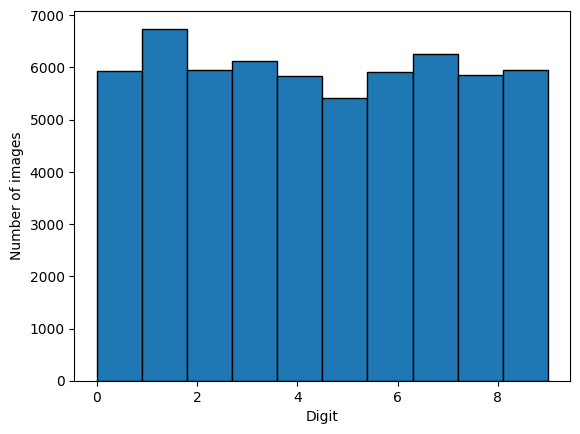

In [3]:
plot.show_hist(train_labels)

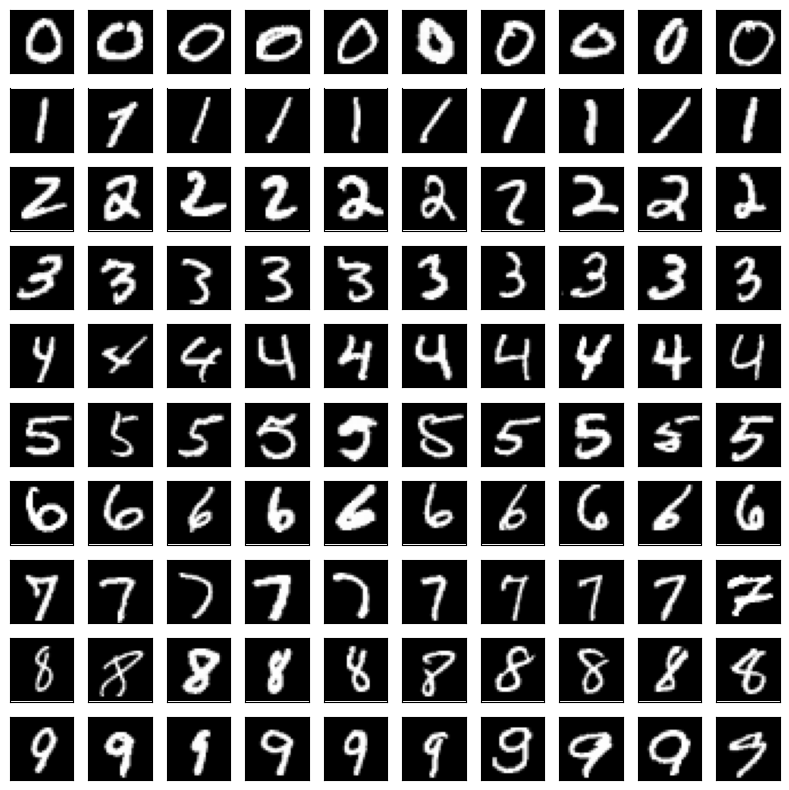

In [4]:
plot.show_image_matrix(train_images, train_labels)

## Test Dataset

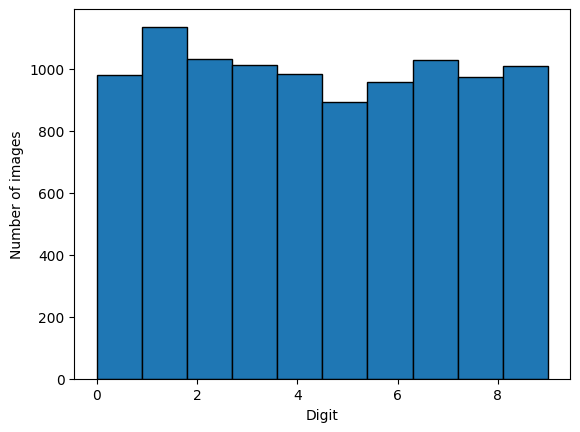

In [5]:
plot.show_hist(test_labels)

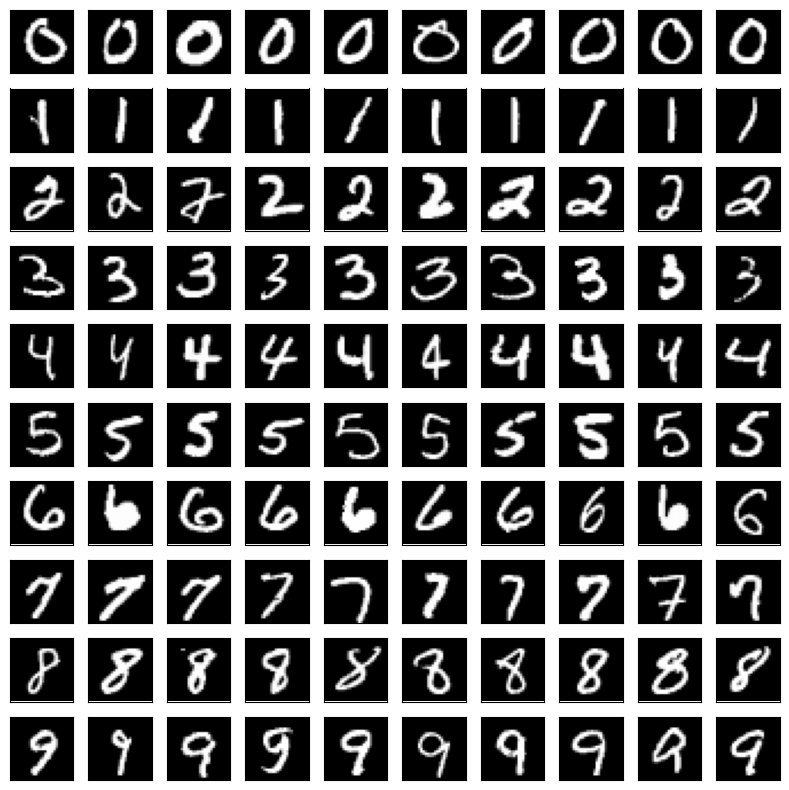

In [6]:
plot.show_image_matrix(test_images, test_labels)

# Aufgabe 2

## Testfälle für die LinearLayer-Klasse

### Test des Forward-Passes

Die Funktion `test_forward_pass` testet die Forward-Pass-Berechnung der `LinearLayer`.

Gegeben:
- Eingabedaten: `[[1, 2], [3, 4]]`
- Gewichte: `[[0.1, 0.2], [0.3, 0.4]]`
- Bias: `[[0.5], [1.0]]`

Die erwartete Ausgabe `A_expected` wird wie folgt berechnet:

$$
A_{\text{expected}} = \text{Eingabe} \cdot \text{Gewichte}^T + \text{Bias}
$$

Durch manuelles Berechnen der Matrixoperationen:

$$
A_{\text{expected}} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} \cdot \begin{bmatrix} 0.1 & 0.3 \\ 0.2 & 0.4 \end{bmatrix} + \begin{bmatrix} 0.5 \\ 1.0 \end{bmatrix} = \begin{bmatrix} 1.0 & 1.6 \\ 2.1 & 3.5 \end{bmatrix}
$$

Der Test bestätigt, dass die tatsächliche Ausgabe mit der erwarteten Ausgabe übereinstimmt.

### Test des Backward-Passes

Die Funktion `test_backward_pass` prüft den Backward-Pass der `LinearLayer`-Klasse, bei dem die Gradienten in Bezug auf die Eingaben und Parameter der Schicht berechnet werden. Dieser Test verwendet festgelegte Eingabedaten und vorgegebene Gewichte, um die Korrektheit der berechneten Gradienten zu überprüfen.

#### Gegeben

- **Eingabedaten**: `[[1, 2], [3, 4]]`
- **Gewichte**: `[[0.1, 0.2], [0.3, 0.4]]`
- **Bias**: `[0.5, 1.0]` (als 1D-Array angepasst, um dem Design der `LinearLayer`-Klasse zu entsprechen)
- **Ausgabegradient** (willkürlich für den Test): `[[0.5, 0.6], [0.7, 0.8]]`

#### Berechnung der erwarteten Gradienten

##### Eingabegradient (expected_dA)

Der Eingabegradient `expected_dA` wird als Produkt des Ausgabegradienten und der Gewichte berechnet:

$$
\text{expected\_dA} = \begin{bmatrix} 0.5 & 0.6 \\ 0.7 & 0.8 \end{bmatrix} \times \begin{bmatrix} 0.1 & 0.2 \\ 0.3 & 0.4 \end{bmatrix}
$$

$$
\text{expected\_dA} = \begin{bmatrix} 0.23 & 0.34 \\ 0.31 & 0.46 \end{bmatrix}
$$

##### Gewichtegradient (expected_weight_gradient)

Der Gewichtegradient `expected_weight_gradient` wird als Produkt der transponierten Ausgabegradienten und des Eingabedaten berechnet:

$$
\text{expected\_weight\_gradient} = \begin{bmatrix} 0.5 & 0.7 \\ 0.6 & 0.8 \end{bmatrix}^T \times \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}
$$

Nach der Korrektur und Neuberechnung:

$$
\text{expected\_weight\_gradient} = \begin{bmatrix} 2.6 & 3.8 \\ 3.0 & 4.4 \end{bmatrix}
$$

##### Biasgradient (expected_bias_gradient)

Der Biasgradient `expected_bias_gradient` wird als Summe der Zeilen des Ausgabegradienten berechnet:

$$
\text{expected\_bias\_gradient} = \sum \begin{bmatrix} 0.5 + 0.7 \\ 0.6 + 0.8 \end{bmatrix} = \begin{bmatrix} 1.2 \\ 1.4 \end{bmatrix}
$$

Der Test bestätigt, dass die tatsächliche Ausgabe mit der erwarteten Ausgabe übereinstimmt.

### Test der Parameteraktualisierung

Die Funktion `test_parameter_update` testet die Aktualisierung von Parametern mithilfe von Gradienten und einer Lernrate.

Gegeben:
- Anfängliche Gewichte: `[[0.5, 0.7], [0.3, 0.4]]`
- Anfänglicher Bias: `[[0.1], [0.2]]`
- Gewichtegradient: `[[-0.2, 0.1], [0.3, -0.1]]`
- Biasgradient: `[[-0.05], [0.03]]`
- Lernrate: `0.1`

Die erwarteten aktualisierten Gewichte und Bias werden wie folgt berechnet:

$$
\text{Erwartete Gewichte} = \text{Anfängliche Gewichte} - \text{Lernrate} \times \text{Gewichtegradient}
$$
$$
\text{Erwarteter Bias} = \text{Anfänglicher Bias} - \text{Lernrate} \times \text{Biasgradient}
$$

Durch manuelle Anwendung der Aktualisierungsregel:

$$
\text{Erwartete Gewichte} = \begin{bmatrix} 0.5 & 0.7 \\ 0.3 & 0.4 \end{bmatrix} - 0.1 \times \begin{bmatrix} -0.2 & 0.1 \\ 0.3 & -0.1 \end{bmatrix}
$$
$$
\text{Erwarteter Bias} = \begin{bmatrix} 0.1 \\ 0.2 \end{bmatrix} - 0.1 \times \begin{bmatrix} -0.05 \\ 0.03 \end{bmatrix}
$$

Der Test bestätigt, dass die Funktion zur Parameteraktualisierung die Gewichte und den Bias entsprechend den Gradienten und der Lernrate korrekt anpasst.


# Aufgabe 3

In [7]:
# Normalize images
train_images = train_images.astype(np.float32) / 255.0
test_images = test_images.astype(np.float32) / 255.0

# Convert labels for binary classification (1 for digit 5, 0 for all other digits)
digit = 5
binary_train_labels = (train_labels == digit).astype(np.float32).reshape(-1, 1)
binary_test_labels = (test_labels == digit).astype(np.float32).reshape(-1, 1)

# Flatten the images for simplicity (28x28 to 784)
binary_train_images = train_images.reshape(train_images.shape[0], -1)
binary_test_images = test_images.reshape(test_images.shape[0], -1)

## Kostenfunktion (Loss Function)

Für binäre Klassifikationsaufgaben ist die binäre Kreuzentropie (Binary Cross-Entropy, BCE) eine häufig verwendete Kostenfunktion. Sie ist definiert als:

$$
BCE(y, \hat{y}) = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i) \right]
$$

Hierbei ist:
- $N$ die Anzahl der Beispiele im Datensatz,
- $y_i$ der tatsächliche Labelwert (0 oder 1) und
- $\hat{y}_i$ der vom Netzwerk vorhergesagte Wert.

Diese Funktion ist besonders geeignet, weil sie die Wahrscheinlichkeit, die durch die Sigmoid-Aktivierungsfunktion des Output-Knotens modelliert wird, direkt berücksichtigt und Strafen für falsche Klassifikationen auf eine Art und Weise anwendet, die gut mit dem Optimierungsprozess zusammenarbeitet.



## Evaluationsfunktion

Für die Bewertung der Modellleistung bei binärer Klassifikation ist die Genauigkeit (Accuracy) eine intuitive Metrik:

$$
\text{Accuracy} = \frac{\text{Anzahl der korrekt klassifizierten Beispiele}}{\text{Gesamtanzahl der Beispiele}}
$$

Diese Metrik ist einfach zu verstehen und gibt den Anteil der korrekt vorhergesagten Beispiele an der Gesamtzahl der Beispiele an.


## Alternative Optionen
### Evaluierungsmetriken:

- **Precision und Recall**: Precision misst das Verhältnis der korrekt positiv klassifizierten Instanzen zur Gesamtzahl der positiven Klassifizierungen, während Recall das Verhältnis der korrekt positiv klassifizierten Instanzen zur Gesamtzahl der tatsächlich positiven Instanzen misst. Diese Metriken sind besonders wichtig, wenn die Klassen im Datensatz stark unbalanciert sind.

- **F1-Score**: Der F1-Score kombiniert Precision und Recall zu einer einzigen Metrik und bietet somit ein ausgewogenes Maß für die Modellleistung, insbesondere wenn Precision und Recall in Konflikt stehen.

- **Kappa-Metrik**: Diese Metrik bewertet die Übereinstimmung zwischen zwei Klassifikatoren, was nützlich ist, wenn mehrere Modelle verglichen werden sollen oder wenn die Leistung eines Modells im Vergleich zu einer zufälligen Klassifikation bewertet werden soll.

- **AUC-ROC-Kurve**: Die Fläche unter der ROC-Kurve (AUC-ROC) misst die Leistungsfähigkeit des Modells, Sensitivität und Spezifität zu kompromittieren. Dies ist besonders nützlich, wenn Sie die Leistung des Modells über verschiedene Schwellenwerte betrachten möchten.

### Loss-Funktionen mit Kostenbezug:

- **Kostenmatrix**: Diese Matrix ermöglicht es, unterschiedliche Kosten für falsch positive und falsch negative Vorhersagen zu berücksichtigen, was besonders wichtig ist, wenn asymmetrische Kosten vorliegen oder wenn das Ziel ist, die Kosten bestimmter Fehler zu minimieren.

Indem man mehrere Metriken betrachtet, kann man ein umfassenderes Bild von der Leistung des Modells erhalten und besser entscheiden, welches Modell für die spezifische Aufgabe am besten geeignet ist.


## Aufgabe 4

### Bedeutung der Hyperparameter-Evaluation

Die systematische Evaluation von Hyperparametern wie der Lernrate (`lr`) und der Größe der versteckten Schicht (`hidden_size`) ist entscheidend für die Optimierung der Leistung eines neuronalen Netzwerks. 

Dieser Prozess ermöglicht es uns, empirisch zu bestimmen, welche Kombination dieser Parameter die beste Balance zwischen Lerneffizienz und Generalisierung bietet. Dies ist wichtig, um die Genauigkeit auf unbekannten Daten zu maximieren.

Durch das Testen verschiedener Konfigurationen können wir die Architektur des neuronalen Netzwerks feinjustieren. Dies passt das Modell optimal an die spezifischen Anforderungen der Aufgabe und die Struktur des Datensatzes an. Dadurch wird Overfitting vermieden und die Zuverlässigkeit des Modells verbessert.

In [8]:
import Train_Models.Binary_Train as bt

In [9]:
epochs = 20
batch_size = 64  # Example batch size
learning_rates = [0.01, 0.1, 1]
hidden_layer_sizes = [4, 8, 16]

# Call the function to evaluate all combinations
binary_evaluation_results = bt.binary_evaluate_combinations(
    binary_train_images, binary_train_labels, binary_test_images, binary_test_labels, epochs, batch_size, learning_rates, hidden_layer_sizes
)

Evaluating model with learning rate 0.01 and hidden layer size 4
Epoch 1, Train Loss: 0.07866063395169866, Test Loss: 0.07423956236336048, Train Accuracy: 0.9722166666666666, Test Accuracy: 0.9753
Epoch 2, Train Loss: 0.05442843679094666, Test Loss: 0.052954495377013425, Train Accuracy: 0.9819666666666667, Test Accuracy: 0.9827
Epoch 3, Train Loss: 0.0490389960531727, Test Loss: 0.04889106874038932, Train Accuracy: 0.9851166666666666, Test Accuracy: 0.9839
Epoch 4, Train Loss: 0.040703307227564614, Test Loss: 0.04334413210861957, Train Accuracy: 0.9868166666666667, Test Accuracy: 0.9844
Epoch 5, Train Loss: 0.038025403276071075, Test Loss: 0.042110817169478995, Train Accuracy: 0.9874333333333334, Test Accuracy: 0.9858
Epoch 6, Train Loss: 0.03530577502089881, Test Loss: 0.039690428057946585, Train Accuracy: 0.9885, Test Accuracy: 0.9856
Epoch 7, Train Loss: 0.033128042213745865, Test Loss: 0.03858367811252384, Train Accuracy: 0.9893833333333333, Test Accuracy: 0.9851
Epoch 8, Train Los

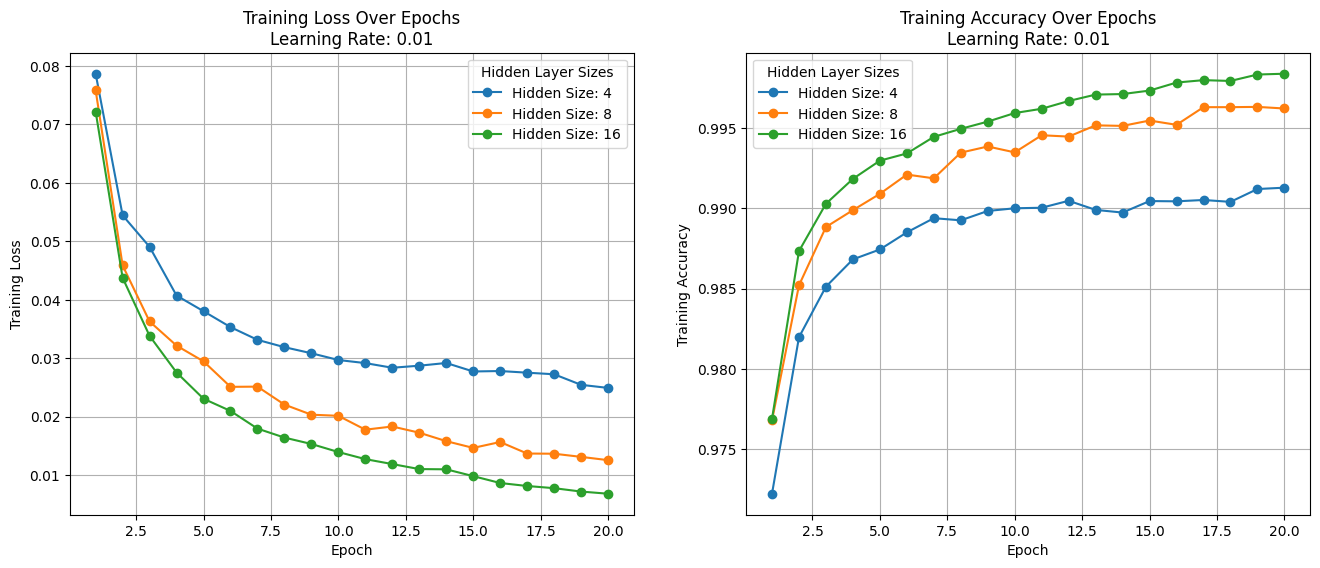

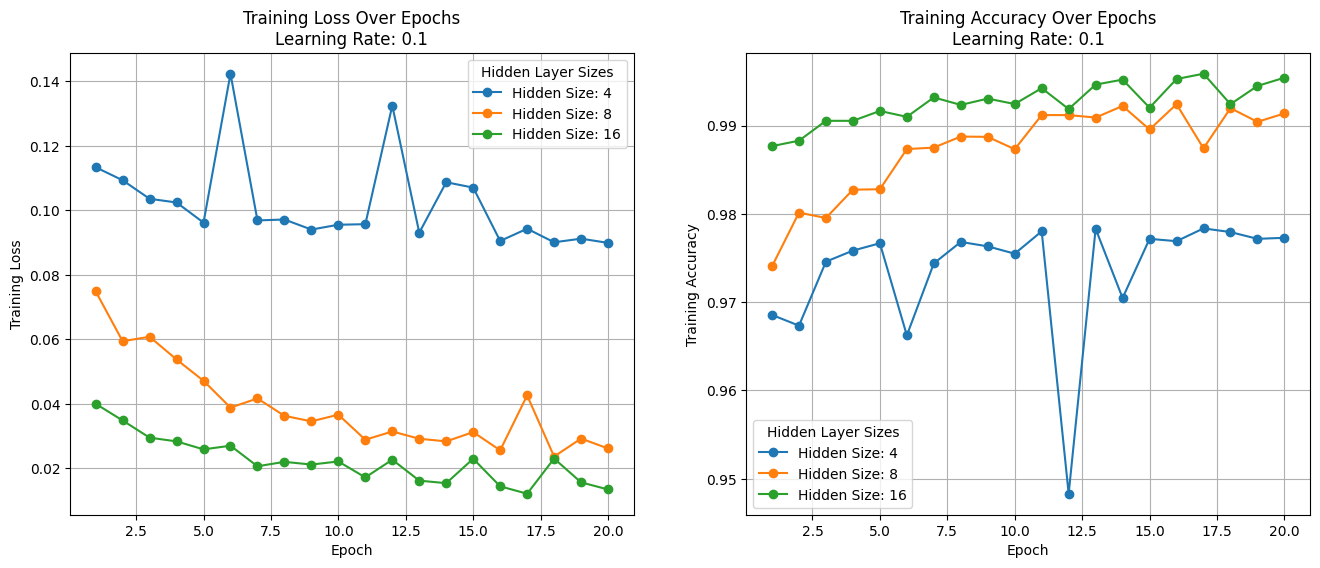

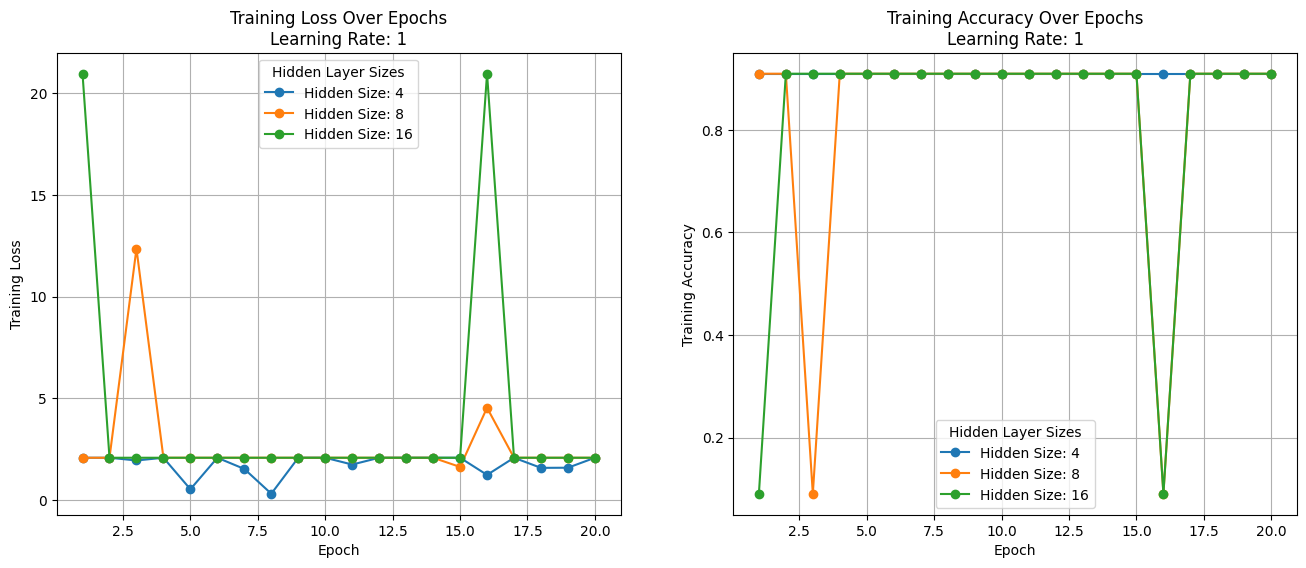

In [10]:
plot.show_evaluation_results(binary_evaluation_results)

In [11]:
ranked_binary_results = res.rank_results(binary_evaluation_results)
print(ranked_binary_results)

Rank 1:
  Learning Rate: 0.01
  Hidden Layer Size: 16
  Last Values:
    train_loss: 0.006797912545386487
    train_accuracy: 0.9983833333333333

Rank 2:
  Learning Rate: 0.01
  Hidden Layer Size: 8
  Last Values:
    train_loss: 0.012543005752669388
    train_accuracy: 0.9962166666666666

Rank 3:
  Learning Rate: 0.1
  Hidden Layer Size: 16
  Last Values:
    train_loss: 0.013481308266986246
    train_accuracy: 0.9954166666666666

Rank 4:
  Learning Rate: 0.01
  Hidden Layer Size: 4
  Last Values:
    train_loss: 0.024901948497391985
    train_accuracy: 0.9912833333333333

Rank 5:
  Learning Rate: 0.1
  Hidden Layer Size: 8
  Last Values:
    train_loss: 0.02619027446110707
    train_accuracy: 0.9913666666666666

Rank 6:
  Learning Rate: 0.1
  Hidden Layer Size: 4
  Last Values:
    train_loss: 0.08993802847986965
    train_accuracy: 0.9772833333333333

Rank 7:
  Learning Rate: 1
  Hidden Layer Size: 4
  Last Values:
    train_loss: 2.080385631611086
    train_accuracy: 0.90965

Rank 

## Aufgabe 5

# Kostenfunktion (Loss Function)

Bei der Multi-Klassen-Klassifikation, bei der es mehr als zwei mögliche Klassenbezeichnungen gibt, ist die binäre Kreuzentropie (BCE) nicht mehr geeignet. Hier wird üblicherweise die Softmax-Cross-Entropie (SCE)-Verlustfunktion verwendet. Sie erweitert das Konzept der BCE für mehrere Klassen:

$$
SCE(y, \hat{y}) = -\frac{1}{N} \sum_{i=1}^{N} \sum_{c=1}^{C} y_{i,c} \cdot \log(\hat{y}_{i,c})
$$

Wobei:
- **N** die Anzahl der Beispiele im Datensatz ist,
- **C** die Anzahl der Klassen ist,
- **$y_{i,c}$** die One-Hot-Enkodierte Bezeichnung für Klasse c in Beispiel i ist (1 für die wahre Klasse, 0 für andere), und
- **$\hat{y}_{i,c}$** die vom Netzwerk vorhergesagte Wahrscheinlichkeit für Klasse c in Beispiel i ist (Ausgabe der Softmax-Aktivierungsfunktion).

SCE misst die Differenz zwischen den echten One-Hot-Enkodierten Bezeichnungen und der vorhergesagten Wahrscheinlichkeitsverteilung für jedes Beispiel. Die Minimierung dieses Verlusts führt dazu, dass das Modell den korrekten Klassen höhere Wahrscheinlichkeiten zuweist.

## Evaluationsfunktion

Die Funktion `categorical_compute_accuracy` berechnet die Genauigkeit (Accuracy) für kategoriale Klassifikation.

**Eingabe:**
- `predictions`: Ein $m \times n$ Matrix von Vorhersagewahrscheinlichkeiten.
- `labels`: Ein $m \times n$ Matrix von tatsächlichen Labels, one-hot encoded.

**Operationen:**
1. Konvertiere `predictions` und `labels` zu Vektoren der vorhergesagten bzw. tatsächlichen Klassen durch die Auswahl des Indexes mit der maximalen Wahrscheinlichkeit:
   
   $$
   \text{predicted\_class}_i = \underset{j}{\mathrm{argmax}}\ (\textit{predictions}_{ij})
   $$
   
   $$
   \text{actual\_class}_i = \underset{j}{\mathrm{argmax}}\ (\textit{labels}_{ij})
   $$
   
   wobei $i$ das Beispiel und $j$ die Klasse indiziert.

2. Berechne die Genauigkeit als den Durchschnitt der korrekt klassifizierten Beispiele:
   
   $$
   \text{Accuracy} = \frac{1}{m} \sum_{i=1}^{m} \mathbb{1}(\text{predicted\_class}_i = \text{actual\_class}_i)
   $$
   
   wobei $\mathbb{1}$ die Indikatorfunktion ist, die 1 zurückgibt, wenn die vorhergesagte Klasse mit der tatsächlichen Klasse übereinstimmt, andernfalls 0.

## Alternative Optionen

### Evaluierungsmetriken:

- **Kategorische Genauigkeit (Categorical Accuracy)**:
  - Diese Metrik misst den Anteil der korrekt klassifizierten Beispiele im Verhältnis zur Gesamtzahl der Beispiele.
  - Berechnung:
    $$
    \text{Categorical Accuracy} = \frac{1}{m} \sum_{i=1}^{m} \mathbb{1}(\text{predicted\_class}_i = \text{actual\_class}_i)
    $$
  - Hierbei sind $\text{predicted\_class}_i$ und $\text{actual\_class}_i$ die vorhergesagte bzw. tatsächliche Klasse des Beispiels $i$.

### Loss-Funktionen:

- **Kategorische Kreuzentropie (Categorical Cross-Entropy)**:
  - Diese Loss-Funktion eignet sich für die kategorische Klassifikation, wenn Ihre Labels direkt als Indizes vorliegen.
  - Berechnung:
    $$
    CCE(y, \hat{y}) = -\frac{1}{N} \sum_{i=1}^{N} \log(\hat{y}_{i,\text{true}})
    $$
  - Wobei $\hat{y}_{i,\text{true}}$ die vom Netzwerk vorhergesagte Wahrscheinlichkeit für die tatsächliche Klasse des Beispiels $i$ ist.

Die Verwendung dieser alternativen Metriken und Loss-Funktionen ermöglicht es Ihnen, die Leistung Ihres Modells in kategorischen Klassifikationsaufgaben effektiv zu bewerten und zu optimieren.


In [12]:
import Train_Models.Categorial_Train as ct

In [13]:
def one_hot_encode(labels, num_classes=None):
    if num_classes is None:
        num_classes = labels.max() + 1
    return np.eye(num_classes)[labels]

In [14]:
categorical_train_labels = one_hot_encode(train_labels)
categorical_test_labels = one_hot_encode(test_labels)

# Flatten the images for simplicity (28x28 to 784)
categorical_train_images = train_images.reshape(train_images.shape[0], -1)
categorical_test_images = test_images.reshape(test_images.shape[0], -1)

In [15]:
epochs = 20
batch_size = 64  # Example batch size
learning_rates = [0.01, 0.1, 1]
hidden_layer_sizes = [4, 8, 16]

# Call the function to evaluate all combinations
categorical_evaluation_results = ct.categorical_evaluate_combinations(
    categorical_train_images, categorical_train_labels, categorical_test_images, categorical_test_labels, epochs, batch_size, learning_rates, hidden_layer_sizes
)

Evaluating model with learning rate 0.01 and hidden layer size 4
Epoch 1, Train Loss: 2.1607019631759865, Test Loss: 2.159909494438679, Train Accuracy: 0.50005, Test Accuracy: 0.4989
Epoch 2, Train Loss: 1.91906793951344, Test Loss: 1.9148898676772361, Train Accuracy: 0.6376333333333334, Test Accuracy: 0.6403
Epoch 3, Train Loss: 1.8654466744402913, Test Loss: 1.8625976482604212, Train Accuracy: 0.68205, Test Accuracy: 0.686
Epoch 4, Train Loss: 1.8469924114020309, Test Loss: 1.8438394038148642, Train Accuracy: 0.7139, Test Accuracy: 0.716
Epoch 5, Train Loss: 1.8242482831280946, Test Loss: 1.8212936632314627, Train Accuracy: 0.7187666666666667, Test Accuracy: 0.7216
Epoch 6, Train Loss: 1.8175587945295983, Test Loss: 1.8160465701020283, Train Accuracy: 0.7317833333333333, Test Accuracy: 0.7316
Epoch 7, Train Loss: 1.809840717703178, Test Loss: 1.8080050199771034, Train Accuracy: 0.7365833333333334, Test Accuracy: 0.7392
Epoch 8, Train Loss: 1.7949607245944683, Test Loss: 1.79249567755

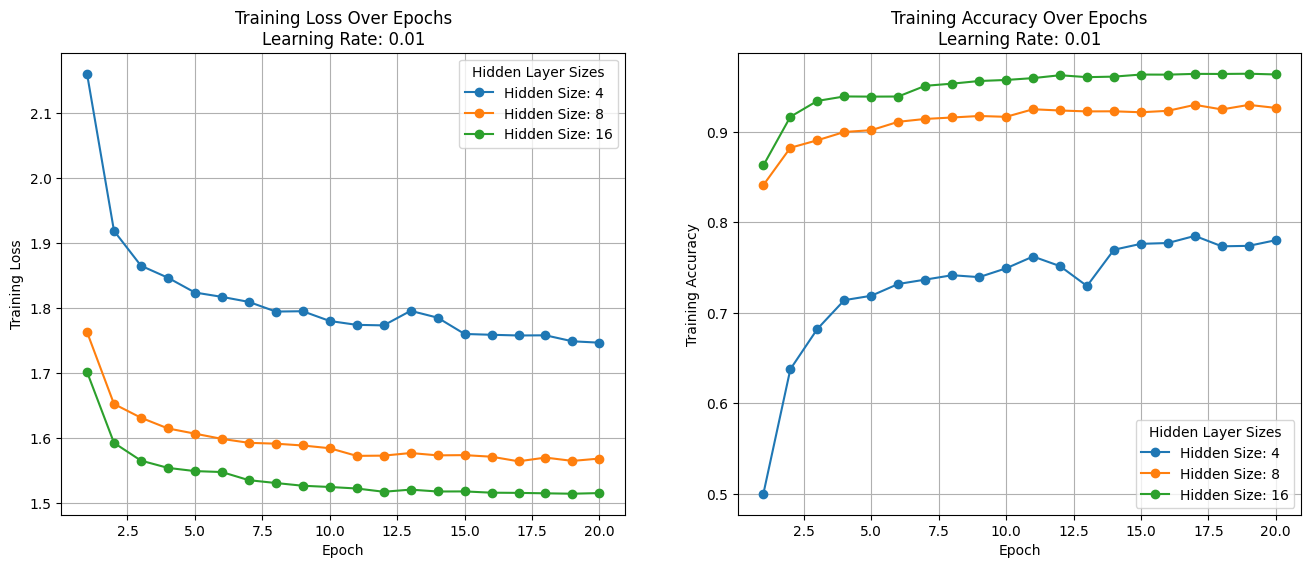

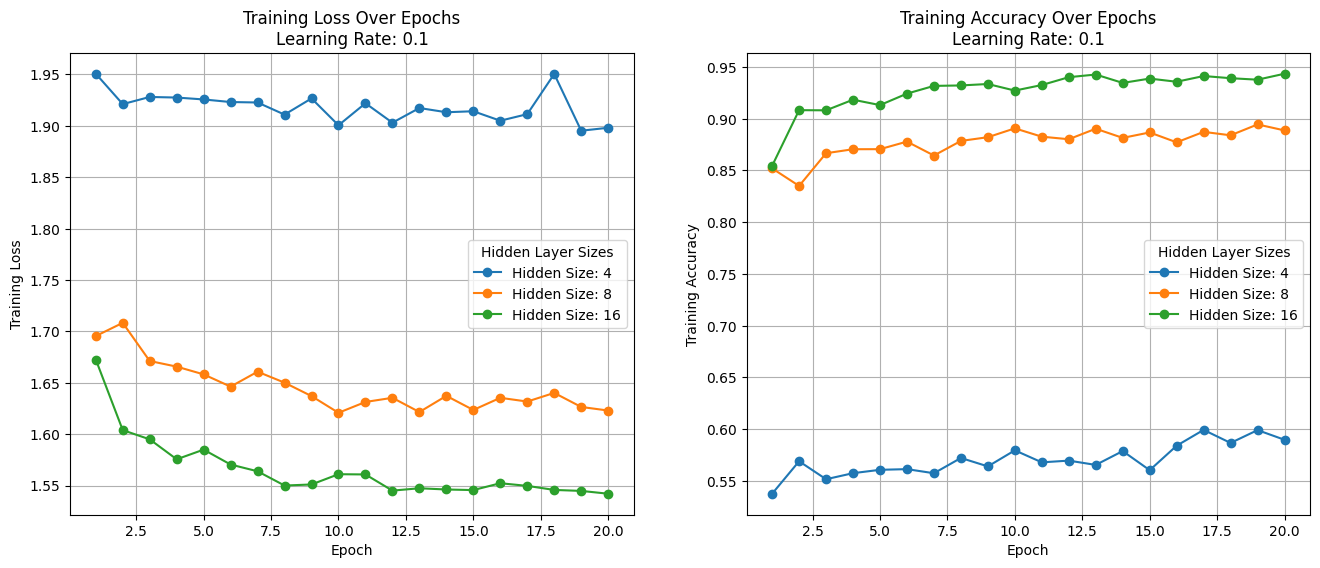

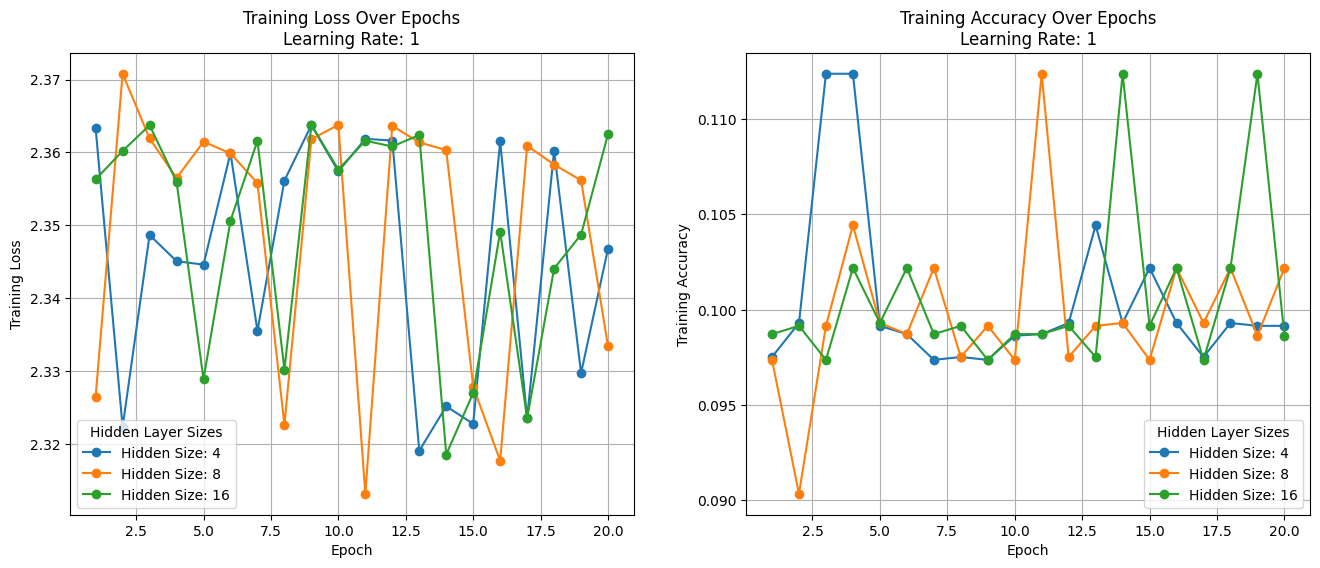

In [16]:
plot.show_evaluation_results(categorical_evaluation_results)

In [17]:
ranked_categorical_results = res.rank_results(categorical_evaluation_results)
print(ranked_categorical_results)

Rank 1:
  Learning Rate: 0.01
  Hidden Layer Size: 16
  Last Values:
    train_loss: 1.5158433800351345
    train_accuracy: 0.9632666666666667

Rank 2:
  Learning Rate: 0.1
  Hidden Layer Size: 16
  Last Values:
    train_loss: 1.5420635239881726
    train_accuracy: 0.9435333333333333

Rank 3:
  Learning Rate: 0.01
  Hidden Layer Size: 8
  Last Values:
    train_loss: 1.568885343439211
    train_accuracy: 0.9263166666666667

Rank 4:
  Learning Rate: 0.1
  Hidden Layer Size: 8
  Last Values:
    train_loss: 1.6229906303775872
    train_accuracy: 0.8887166666666667

Rank 5:
  Learning Rate: 0.01
  Hidden Layer Size: 4
  Last Values:
    train_loss: 1.7471137143928765
    train_accuracy: 0.7801666666666667

Rank 6:
  Learning Rate: 0.1
  Hidden Layer Size: 4
  Last Values:
    train_loss: 1.8981003046043023
    train_accuracy: 0.5896333333333333

Rank 7:
  Learning Rate: 1
  Hidden Layer Size: 8
  Last Values:
    train_loss: 2.3333968428926224
    train_accuracy: 0.10218333333333333

Ran